In [4]:
from pystac_client import Client
from pystac.extensions.eo import EOExtension as eo
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest 
# Gulf of Mexico
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [-95.55929182495876, 24.972826325385128],
      [-84.22837744734612, 24.972826325385128],
      [-84.22837744734612, 31.774348789950807],
      [-95.55929182495876, 31.774348789950807],
      [-95.55929182495876, 24.972826325385128]
    ]
  ]
}

In [5]:
time_of_interest = "2000-01-01/2020-12-31"

In [8]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

search = catalog.search(
    collections=["landsat-8-c2-l2"],
    intersects=aoi,
    datetime=time_of_interest,
    query={"eo:cloud_cover": {"lt": 5}}

)

# Check how many items were returned
items = list(search.get_items())
print(f"Returned {len(items)} Items")

Returned 1275 Items


In [9]:
#plotting the area 

In [11]:
from fastai.vision.all import *
#We take the global water polygons, then filter out to keep only the coastal rim 50m iwards and 100m to sea.
full_res_water = "https://osmdata.openstreetmap.de/download/water-polygons-split-3857.zip"
low_res_water =  "https://osmdata.openstreetmap.de/download/simplified-water-polygons-split-3857.zip"

In [12]:
path=untar_data(low_res_water)

In [15]:
import geopandas as gpd
df = gpd.read_file(path)

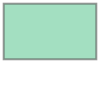

In [18]:
#clip small location
from shapely.geometry import Polygon
s =[Polygon( 
    [
      [-95.55929182495876, 24.972826325385128],
      [-84.22837744734612, 24.972826325385128],
      [-84.22837744734612, 31.774348789950807],
      [-95.55929182495876, 31.774348789950807],
      [-95.55929182495876, 24.972826325385128]
    
  ]
)]
d = {'col1': ['BC'], 'geometry':s}
small = gpd.GeoDataFrame(d, crs="EPSG:4326")
s[0]

<AxesSubplot:>

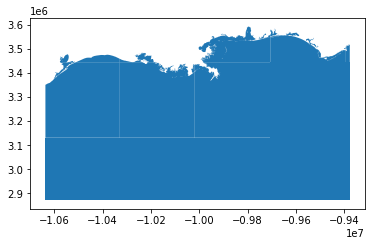

In [19]:
small= gpd.clip(df.to_crs('epsg:4326'),small).to_crs('epsg:3857')
small.plot()